## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
import re

## Loading data

In [2]:
data = pd.read_csv('/Users/claudia/Ironhack/Mid-Bootcamp Project/Linear_Regression_MidBootCampProject-/df_2nd_iter_feat_extract.csv') 
data.head()

,Unnamed: 0,sqft_above,sqft_living15,bathrooms,view,sqft_basement,floors,grade,condition,yr_built,yr_renovated,price
0,0,1450,1260,up to 1.75,without a view,0,1 floor,very good,4,old,not renovated,435000
1,1,3310,2380,up to 2.50,without a view,0,up to 2 floors,very good,3,brand new,not renovated,555000
2,2,1140,2200,up to 2.50,without a view,800,1 floor,very good,4,old,not renovated,550000
3,3,1280,1590,up to 2.50,without a view,350,up to 2 floors,very good,3,new,not renovated,295000
4,4,1700,2380,up to 2.50,without a view,900,1 floor,very good,4,old,not renovated,790000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     21597 non-null  int64 
 1   sqft_above     21597 non-null  int64 
 2   sqft_living15  21597 non-null  int64 
 3   bathrooms      21597 non-null  object
 4   view           21597 non-null  object
 5   sqft_basement  21597 non-null  int64 
 6   floors         21597 non-null  object
 7   grade          21597 non-null  object
 8   condition      21597 non-null  int64 
 9   yr_built       21597 non-null  object
 10  yr_renovated   21597 non-null  object
 11  price          21597 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.0+ MB


In [4]:
data = data.drop(['Unnamed: 0', 'condition'], axis=1)

## Splitting the dataset between the categorical and numerical columns

In [5]:
categoricals = data.select_dtypes(np.object)
numericals = data.select_dtypes(np.number)


print("Dataframe of numerical columns: ")
print()

display(numericals)

print("Dataframe of categorical columns: ")
print()

display(categoricals)

Dataframe of numerical columns: 



,sqft_above,sqft_living15,sqft_basement,price
0,1450,1260,0,435000
1,3310,2380,0,555000
2,1140,2200,800,550000
3,1280,1590,350,295000
4,1700,2380,900,790000
...,...,...,...,...
21592,1380,1810,600,725000
21593,1410,2950,0,335000
21594,1870,1870,0,450000
21595,720,920,670,445500


Dataframe of categorical columns: 



,bathrooms,view,floors,grade,yr_built,yr_renovated
0,up to 1.75,without a view,1 floor,very good,old,not renovated
1,up to 2.50,without a view,up to 2 floors,very good,brand new,not renovated
2,up to 2.50,without a view,1 floor,very good,old,not renovated
3,up to 2.50,without a view,up to 2 floors,very good,new,not renovated
4,up to 2.50,without a view,1 floor,very good,old,not renovated
...,...,...,...,...,...,...
21592,up to 1.75,without a view,1 floor,very good,old,not renovated
21593,up to 2.50,without a view,1 floor,very good,old,not renovated
21594,up to 2.50,without a view,up to 2 floors,very good,old,not renovated
21595,up to 1.75,without a view,1 floor,very good,old,not renovated


## Normalising the numerical features

In [6]:
#Lets apply scaling to the numerical columns except the final column
#which will be our y variable, average gift

from sklearn.preprocessing import StandardScaler

transformer = StandardScaler().fit(numericals.iloc[:,:-1])
scaled_numericals = transformer.transform(numericals.iloc[:,:-1])

Getting a dataframe with the result from the standard scaler which is a numpy array.

As the numpy arrays doesn't have column names, we pick up the column names from the numerical (original) dataframe.

In [7]:
pdscaled_numericals= pd.DataFrame(scaled_numericals,columns=numericals.columns.tolist()[:-1])

In [8]:
pdscaled_numericals.head()

,sqft_above,sqft_living15,sqft_basement
0,-0.409062,-1.060427,-0.659031
1,1.838019,0.574097,-0.659031
2,-0.783575,0.311406,1.148235
3,-0.614440,-0.578826,0.131648
4,-0.107035,0.574097,1.374143


## Dummifying categorical columns

In [9]:
cat_encoded = pd.get_dummies(categoricals, drop_first=True)
cat_encoded.head()


,bathrooms_up to 1.75,bathrooms_up to 2.50,view_without a view,floors_more than 2 floors,floors_up to 2 floors,grade_poor,grade_very good,yr_built_new,yr_built_old,yr_renovated_renovated
0,1,0,1,0,0,0,1,0,1,0
1,0,1,1,0,1,0,1,0,0,0
2,0,1,1,0,0,0,1,0,1,0
3,0,1,1,0,1,0,1,1,0,0
4,0,1,1,0,0,0,1,0,1,0


## Putting everything together

In [10]:
full = pd.concat([pdscaled_numericals.iloc[:,:-1],cat_encoded,numericals.iloc[:,-1]],axis=1)
print("The dataset size is: ", full.shape)
print()
full

The dataset size is:  (21597, 13)



,sqft_above,sqft_living15,bathrooms_up to 1.75,bathrooms_up to 2.50,view_without a view,floors_more than 2 floors,floors_up to 2 floors,grade_poor,grade_very good,yr_built_new,yr_built_old,yr_renovated_renovated,price
0,-0.409062,-1.060427,1,0,1,0,0,0,1,0,1,0,435000
1,1.838019,0.574097,0,1,1,0,1,0,1,0,0,0,555000
2,-0.783575,0.311406,0,1,1,0,0,0,1,0,1,0,550000
3,-0.614440,-0.578826,0,1,1,0,1,0,1,1,0,0,295000
4,-0.107035,0.574097,0,1,1,0,0,0,1,0,1,0,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.493629,-0.257759,1,0,1,0,0,0,1,0,1,0,725000
21593,-0.457386,1.405953,0,1,1,0,0,0,1,0,1,0,335000
21594,0.098344,-0.170195,0,1,1,0,1,0,1,0,1,0,450000
21595,-1.290980,-1.556622,1,0,1,0,0,0,1,0,1,0,445500


In [11]:
full.columns.tolist()

['sqft_above',
 'sqft_living15',
 'bathrooms_up to 1.75',
 'bathrooms_up to 2.50',
 'view_without a view',
 'floors_more than 2 floors',
 'floors_up to 2 floors',
 'grade_poor',
 'grade_very good',
 'yr_built_new',
 'yr_built_old',
 'yr_renovated_renovated',
 'price']

In [12]:
full_x = pd.DataFrame(full,columns=full.columns.tolist()[:-1])
full_x.head()

,sqft_above,sqft_living15,bathrooms_up to 1.75,bathrooms_up to 2.50,view_without a view,floors_more than 2 floors,floors_up to 2 floors,grade_poor,grade_very good,yr_built_new,yr_built_old,yr_renovated_renovated
0,-0.409062,-1.060427,1,0,1,0,0,0,1,0,1,0
1,1.838019,0.574097,0,1,1,0,1,0,1,0,0,0
2,-0.783575,0.311406,0,1,1,0,0,0,1,0,1,0
3,-0.614440,-0.578826,0,1,1,0,1,0,1,1,0,0
4,-0.107035,0.574097,0,1,1,0,0,0,1,0,1,0


In [13]:
full_x.columns

Index(['sqft_above', 'sqft_living15', 'bathrooms_up to 1.75',
       'bathrooms_up to 2.50', 'view_without a view',
       'floors_more than 2 floors', 'floors_up to 2 floors', 'grade_poor',
       'grade_very good', 'yr_built_new', 'yr_built_old',
       'yr_renovated_renovated'],
      dtype='object')

In [14]:
full_x

,sqft_above,sqft_living15,bathrooms_up to 1.75,bathrooms_up to 2.50,view_without a view,floors_more than 2 floors,floors_up to 2 floors,grade_poor,grade_very good,yr_built_new,yr_built_old,yr_renovated_renovated
0,-0.409062,-1.060427,1,0,1,0,0,0,1,0,1,0
1,1.838019,0.574097,0,1,1,0,1,0,1,0,0,0
2,-0.783575,0.311406,0,1,1,0,0,0,1,0,1,0
3,-0.614440,-0.578826,0,1,1,0,1,0,1,1,0,0
4,-0.107035,0.574097,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.493629,-0.257759,1,0,1,0,0,0,1,0,1,0
21593,-0.457386,1.405953,0,1,1,0,0,0,1,0,1,0
21594,0.098344,-0.170195,0,1,1,0,1,0,1,0,1,0
21595,-1.290980,-1.556622,1,0,1,0,0,0,1,0,1,0


In [15]:
#define X and y. 
#X is all the features, scaled numericals and encoded categoricals which are our independent variables
#y is the variable we seek to predict 

X = full_x
y = full['price']

In [18]:
# Normalazing Y 
sc_y = StandardScaler()
y = np.array(y).reshape(-1,1)
y = sc_y.fit_transform(y)
#y = y.flatten()
y

array([[-0.28663077],
       [ 0.04002461],
       [ 0.02641397],
       ...,
       [-0.24579884],
       [-0.25804842],
       [ 2.09523136]])

## Splitting data intro train and test sets.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Getting prediction with Linear Regression

In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#apply the machine learn model 
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions  = lm.predict(X_test)
r2_score(y_test, predictions)
#use r2 score to see if this is closer to the data (ie better at predicating 
#target_d, than without the help of the learning process)

0.5416587345188505

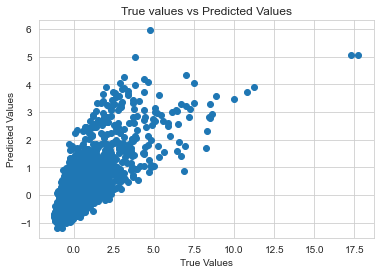

In [22]:
plt.scatter(x=y_test, y=predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

## Training the K-NN model

In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=4) # The keyword "n_neighbors" is what sets the K.
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

## Getting our predictions

In [24]:
knn_predictions = knn_model.predict(X_test)
# to get some predictions for y we use the x test set. 
# we will later compare the predictions from x test to real test y 

## Getting the error metrics of our K-NN model

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.46
The mean squared error of the model in the test set is:   0.52
The root mean squared error of the model in the test set is:   0.72
The R2 of the model in the test set is: 0.56


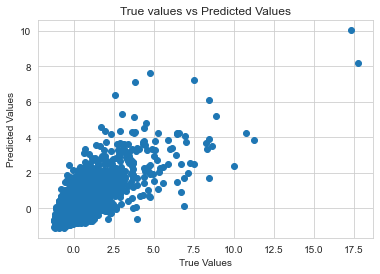

In [26]:
plt.scatter(x=y_test, y=knn_predictions)
plt.title("True values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

plt.show()

## Improving KNN

K 
Let's try to find the best K value from a pre-defined set of values.

In [30]:
scores = [] # We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,10): # The values of K. = 2,3,4,5,6,7,8,9
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Now let's plot how it changes the score as a function of K.

Text(0, 0.5, 'R2')

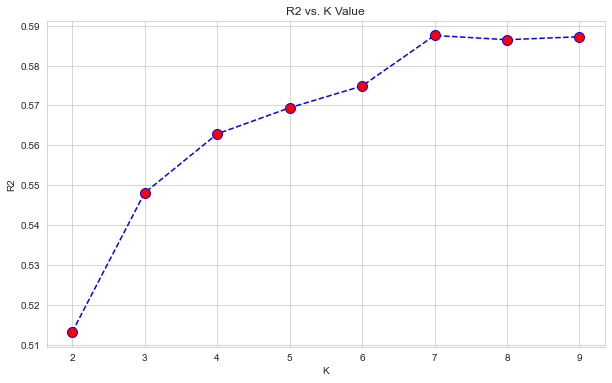

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')

#threshold = 0.01 # minimum difference we want between two R2 consecutive values.
#delta = 10. # difference between two consecutive R2 values.
#k = 3 # initival value
#old_score = 0.

#while (delta >= threshold):
#  knn_model = KNeighborsRegressor(n_neighbors=k) # The keyword "n_neighbors" is what sets the K.
#  knn_model.fit(X_train, y_train)
#  knn_predictions = knn_model.predict(X_test) 
#  new_score = r2_score(y_test,knn_predictions)
#  delta = new_score - old_score
#  k = k + 4 
#  old_score = new_score

Applying a higher K suggested by the test

In [32]:
uniform_model = KNeighborsRegressor(n_neighbors=9)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.5872136562568695

## Best predicted score for this iteration is 0.59